In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

%matplotlib inline

In [7]:
os.getcwd()

'c:\\Users\\EonKim\\Desktop\\kyunghee\\books\\python01\\visual'

In [9]:
path = r'C:\Users\EonKim\Desktop\kyunghee\books\python01\dataset'
os.chdir(path)

death = pd.read_csv('deathrates.csv')
pop = pd.read_csv('popcities10.csv')

1. 다운로드 받은 deathrates.csv 파일에는 1950년대 중반 30개 국가의 인구 10만명 당 교통사고 사망률 데이터가 들어 있습니다

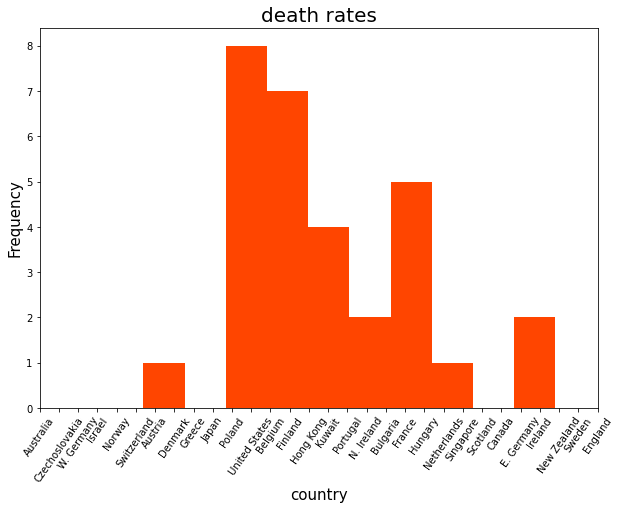

In [42]:
# (1) hist( ) 함수를 사용하여 교통사고 사망률에 대한 히스토그램(histgram)을 그리는 코드를 적으시오. 
# 그래프에는 x축, y축의 값을 설명하는 레이블이 포함되어야 하며 그 외의 부분은 기본값을 그대로 사용합니다
plt.figure(figsize = (10, 7))
plt.hist(death.loc[:,'death'], color = 'OrangeRed')
plt.ylabel('Frequency', size = 15)
plt.xlabel('country', size = 15)
plt.title('death rates', size = 20)
plt.xticks(np.arange(0,30),labels = death.loc[:,'country'].values, rotation = 55)
plt.show()


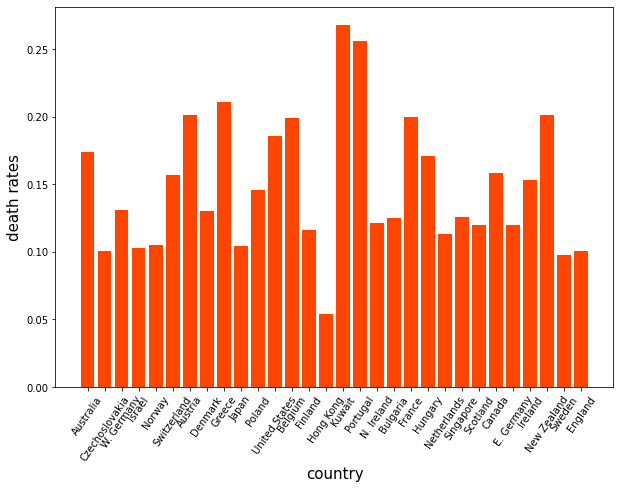

In [71]:
# (2) bar( ) 함수를 사용하여 국가별 교통사고 사망률을 오름차순으로 정렬하여 막대그래프로 나타내는 코드를 적으시오. 
# 그래프에는 x축, y축의 값을 설명하는 레이블이 포함되어야 하며 그 외의 부분은 기본값을 그대로 사용합니다.

plt.figure(figsize = (10, 7))
plt.bar(x = range(0, 30), height = death.loc[:,'death']/100, color = 'OrangeRed')
plt.ylabel('death rates', size = 15)
plt.xlabel('country', size = 15)
plt.xticks(range(0,30), labels = death.loc[:,'country'], rotation = 55)
plt.show()

In [80]:
# (3) cut( ) 함수를 사용하여 전체 교통사고 사망률을 낮음, 보통, 높음의 세 가지 값으로 분류하기 위한 코드를 적으시오. 
# 낮음, 보통, 높음의 기준은 각자 임의로 설정할 수 있습니다.

death['Traffic Death Rates'] = pd.cut(death.loc[:,'death'], labels = ['LOW', 'MEDIUM', 'HIGH'], bins = 3)

In [74]:
import seaborn as sns

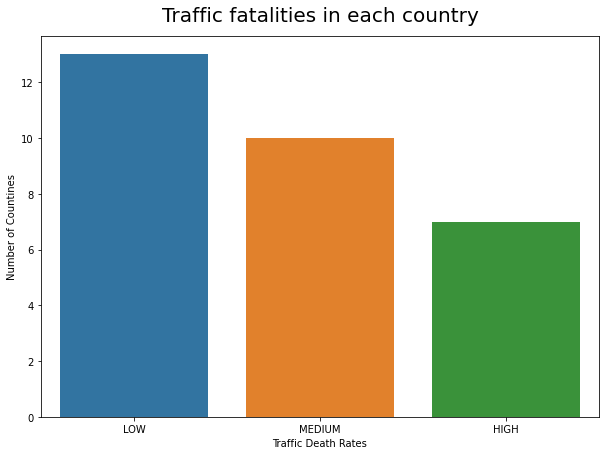

In [84]:
# (4) (3)에서 가공된 교통사고 데이터를 사용하여 그 결과를 아래 <그림1>과 같이 막대그래프로 나타내는 코드를 적으시오. 
# 앞서 두 문제와 마찬가지로 그래프에는 제목과 x축, y축의 값을 설명하는 레이블이 포함되어야 합니다.

plt.figure(figsize = (10, 7))
sns.countplot(data = death, x = 'Traffic Death Rates')
plt.ylabel('Number of Countines')
plt.title('Traffic fatalities in each country', size = 20, pad = 15 )
plt.show()


2. popcities10.csv 파일에는 한국 내 83개 도시의 2000년, 2005년, 2010년 인구 데이터가 포함되어 있습니다

In [85]:
pop

,rank,provinces,municipality,pop10,pop05,pop00
0,1,NaN,Seoul,9794304,9762546,9853972
1,2,NaN,Busan,3414950,3512547,3655437
2,3,NaN,Incheon,2662509,2590863,2466338
3,4,NaN,Daegu,2446418,2456016,2473990
4,5,NaN,Daejeon,1501859,1438551,1365961
...,...,...,...,...,...,...
78,79,NaN,Mungyeong,69021,70813,90778
79,80,NaN,Samcheok,67454,67957,75592
80,81,Gyeonggi,Gwacheon,66704,56587,66592
81,82,Gangwondo,Taebaek,51558,55241,54164


In [159]:
pop10 = pop.groupby('provinces')['pop10'].sum()

In [160]:
pop10

provinces
Chungcheongbukdo      666924
Chungcheongnamdo      853299
Gangwondo             857710
Gyeonggi            11102805
Gyeongsangbukdo      1828372
Gyeongsangnamdo      2264803
Jeollabukdo          1206640
Jeollanamdo           778567
Name: pop10, dtype: int64

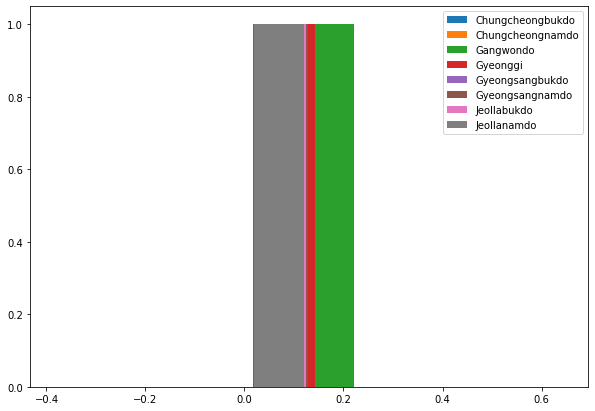

In [177]:
plt.figure(figsize = (10, 7))
for i in range(len(pop10)):
    plt.hist(np.log(pop10)[i]/sum(np.log(pop10)), label =pop10.index[i])
# plt.xticks(ticks = np.log(pop10.values.tolist()), rotation = 45)
plt.legend()
plt.show()

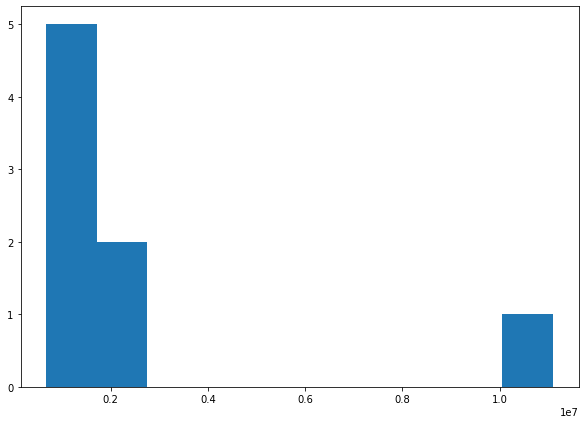

In [183]:
plt.figure(figsize = (10, 7))
plt.hist(pop10.values)
# plt.xticks(ticks = np.log(pop10.values.tolist()), rotation = 45)
plt.show()

In [218]:
# (3) 2010년을 기준으로 경기도에서 인구가 가장 많은 다섯 개 도시를 선택하고 선택된 도시의 인구를 막대그래프로 보여주기 위한 코드를 적으시오. 
# 도시의 이름은 막대그래프 하단에 표시되어야 합니다.
p = pop[pop['provinces'] == 'Gyeonggi']
pop_trans = pop.groupby(['municipality']).sum().sort_values(by = 'pop10',ascending=False)[:5]

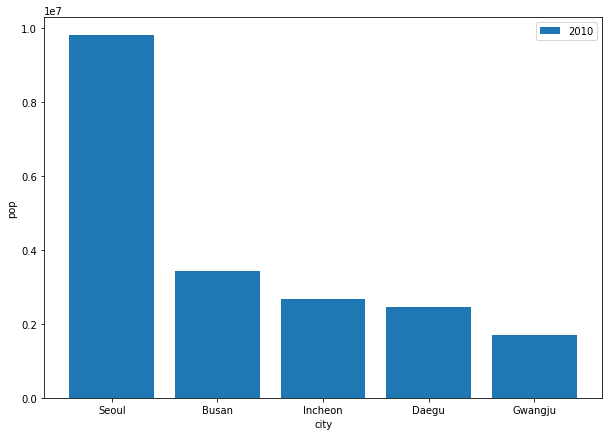

In [225]:
plt.figure(figsize = (10, 7))
plt.bar(x = range(5), height = pop_trans.loc[:,'pop10'], label = '2010')
plt.xticks(range(5), labels = pop_trans.index)
plt.xlabel('city')
plt.ylabel('pop')
plt.legend()
plt.show()

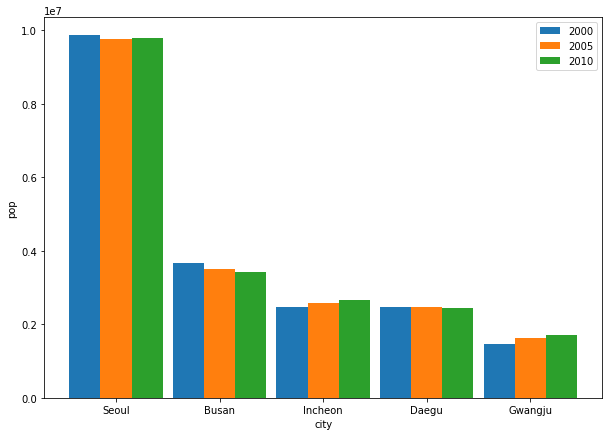

In [224]:
# (4) 2010년을 기준으로 인구가 가장 많은 다섯 개 도시를 선택하고 이들의 2000년, 2005년, 2010년 인구를 연도별로 각각 색상을 달리하여 아래 <그림3>과 같은 막대그래프로 나타
# 내는 코드를 적으시오. 그래프의 하단에는 각 도시의 이름이 명확하게 표기되어야 하며 제목, x축, y축의 값을 설명하는 레이블도 포함되어야 합니다.

plt.figure(figsize = (10, 7))
ticks = 0.3
plt.bar(x = np.arange(5) - ticks, width = ticks, height = pop_trans.loc[:,'pop00'], label = '2000')
plt.bar(x = range(5), width = ticks, height = pop_trans.loc[:,'pop05'], label = '2005')
plt.bar(x = np.arange(5) + ticks, width = ticks, height = pop_trans.loc[:,'pop10'], label = '2010')
plt.xticks(range(5), labels = pop_trans.index)
plt.xlabel('city')
plt.ylabel('pop')
plt.legend()
plt.show()